In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import torch
import torch.nn as nn
print(f'PyTorch version: {torch.__version__}')

PyTorch version: 1.9.0+cu102


# Univariate Linear Regression

## 1-D linear regression problem
- Given one dimensional data, plot the best fitted line

## Goal
- Construct a linear model using PyTorch
- Select the loss function and optimization method
- Train the model using the stochastic gradient descent (SGD) method
- Plot the results and compare the optimized parameters

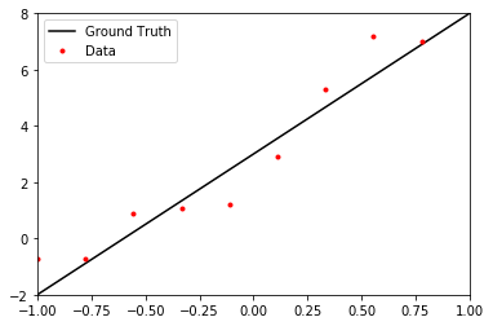

## 1D data generation



- w, b: Linear function parameters
- x_true, y_true: Ground truth linear function
- x_data, y_data: Collected data (In this example, randomly generated data)
- n: number of data points

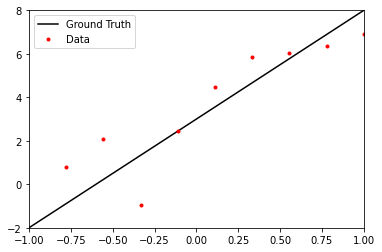

In [2]:
def f1(x, w, b):
    return w*x + b

w = 5.
b = 3.

x_true = np.linspace(-1,1,100)
y_true = f1(x_true, w, b)

n = 10
x_data = np.linspace(-1, 1, n)
y_data = f1(x_data, w, b) + np.random.randn(n)

plt.plot(x_true, y_true, "k-", label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.legend()
plt.xlim([-1, 1])
plt.ylim([-2, 8])
plt.show()

## Transforming data from numpy to pytorch tensors

- Numpy array: 

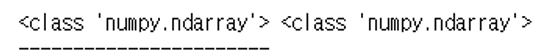

- Tensor: 

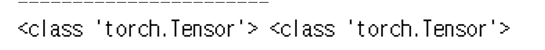

In [3]:
# Data currently as numpy
print(type(x_data), type(y_data))
print('-----------------------')

# Transform numpy datatypes to pytorch tensors

############# COMPLETE THE CODE BELOW #############
x_data_tensor = torch.from_numpy(x_data.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))
###################################################

print(type(x_data_tensor), type(y_data_tensor))
print('-----------------------')
print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
-----------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
-----------------------
torch.Size([10]) torch.Size([10])


(A) torch.from_numpy(x_data.astype(np.float32))
(B) torch.from_numpy(y_data.astype(np.float32))

In [4]:
# In order to use the in-built pytorch models, we need to convert the tensors into 2d arrays
############# COMPLETE THE CODE BELOW #############
x_data_tensor = x_data_tensor.view(-1, 1)
y_data_tensor = y_data_tensor.view(-1, 1)
###################################################

print(x_data_tensor.shape, y_data_tensor.shape)

torch.Size([10, 1]) torch.Size([10, 1])


(A) x_data_tensor.view(-1,1)
(B) y_data_tensor.view(-1,1)

**tensor.view(): Reshape function

## Create linear model

- Use PyTorch's built-in function nn.Linear()
- We need to determine input/output size for the linear model
- We can easily access to weight and bias value via model.weight and model.bias functions

In [5]:
# First, specify number of dimensions for both input and output data

############# COMPLETE THE CODE BELOW #############
input_size = 1
output_size = 1
###################################################

model = nn.Linear(input_size, output_size)

# The linear model initializes its weight and bias values randomly
print(model.weight)
print(model.bias)
print('-----------------------')

Parameter containing:
tensor([[-0.2298]], requires_grad=True)
Parameter containing:
tensor([0.2356], requires_grad=True)
-----------------------


- Checkout that .item() function can be used only when a single number extracted from tensor

In [6]:
# Remember, we can print out only the values in the following way

############# COMPLETE THE CODE BELOW #############
weight = model.weight[0, 0].item()
bias = model.bias[0].item()
###################################################

print(f'Weight: {weight:.5f}\tBias: {bias:.5f}')
print("Weight: " + str(model.weight[0,0]) + "\tBias: " + str(model.bias[0]))

Weight: -0.22980	Bias: 0.23561
Weight: tensor(-0.2298, grad_fn=<SelectBackward>)	Bias: tensor(0.2356, grad_fn=<SelectBackward>)


(A) model.weight[0,0].item()
(B) model.bias[0].item()

## Set loss and optimizing methods

- Learning rate is used for optimizer (SGD)
- Mean Square Error(MSE) loss is used in this code

In [7]:
# For linear regression, we will use the mean squared error loss and optimize the model using the stochastic gradient descent method
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training the model

- Forward pass:
  - Input: Tensor
  - Output: Tensor

** If you rerun this cell several times, you can reupdate the parameters

In [8]:
# Set the number of epochs
num_epochs = 1000

for epoch in range(num_epochs):
    
    ############# COMPLETE THE CODE BELOW #############
    # Compute forward pass
    y_pred_tensor = model(x_data_tensor)
    
    # Compute loss (The computed loss is a tensor!)
    loss = loss_method(y_pred_tensor, y_data_tensor)
    ###################################################
    
    # Compute backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    optimizer.zero_grad() # IMPORTANT: Do not forget this step to reset the gradients to zero!
    
    # Print progress
    if (epoch + 1) % 50 == 0:
        print(f'Epoch: {epoch+1}\tLoss = {loss.item():.5f}')

Epoch: 50	Loss = 7.62504
Epoch: 100	Loss = 4.07727
Epoch: 150	Loss = 2.79613
Epoch: 200	Loss = 2.26853
Epoch: 250	Loss = 2.04073
Epoch: 300	Loss = 1.94088
Epoch: 350	Loss = 1.89691
Epoch: 400	Loss = 1.87752
Epoch: 450	Loss = 1.86897
Epoch: 500	Loss = 1.86519
Epoch: 550	Loss = 1.86353
Epoch: 600	Loss = 1.86279
Epoch: 650	Loss = 1.86247
Epoch: 700	Loss = 1.86233
Epoch: 750	Loss = 1.86226
Epoch: 800	Loss = 1.86223
Epoch: 850	Loss = 1.86222
Epoch: 900	Loss = 1.86222
Epoch: 950	Loss = 1.86221
Epoch: 1000	Loss = 1.86221


- (A) model(x_data_tensor)
- (B) loss_method(y_pred_tensor, y_data_tensor)

## Plotting the results

Original parameters: w = 5.0, b = 3.0
Trained parameters: w = 4.84077, b = 3.00886


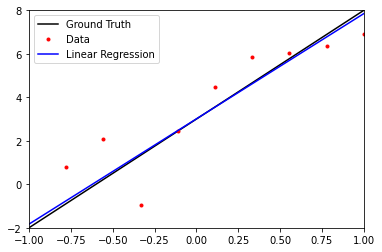

In [9]:
# Change the numpy array x_true to a 2d tensor

x_true_tensor = torch.from_numpy(x_true.astype(np.float32)).view(-1,1)

# Obtain the predicted results in the numpy datatype

y_pred_tensor = model(x_true_tensor).detach() # IMPORTANT: Remember to remove this variable from the computational graph!
y_pred = y_pred_tensor.numpy()

# Check the trained model's parameters
print(f'Original parameters: w = {w}, b = {b}')

############# COMPLETE THE CODE BELOW #############
weight = model.weight[0, 0].item()
bias = model.bias[0].item()
###################################################

print(f'Trained parameters: w = {weight:.5f}, b = {bias:.5f}')

# Plot the results
plt.plot(x_true, y_true, "k-", label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.plot(x_true, y_pred, "b-", label="Linear Regression")
plt.legend()
plt.xlim([-1, 1])
plt.ylim([-2, 8])
plt.show()

- (A) model.weight[0,0].item()
- (B) model.bias[0].item()



---



---



# Multivariate Linear Regression

2D Linear regression problem
- Given two dimensional data, plot the best fitted surface

Goal
- Construct a linear model using PyTorch
- Select the loss function and optimization method
- Train the model using the stochastic gradient descent (SGD) method
- Plot the results and compare the optimized parameters

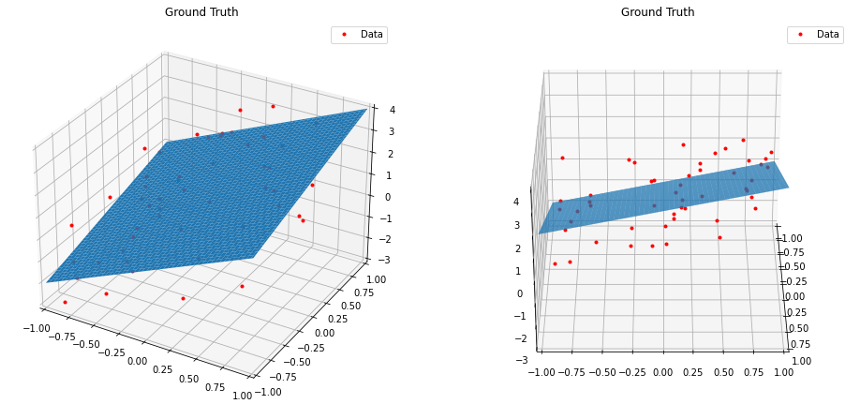

## 2D data generation

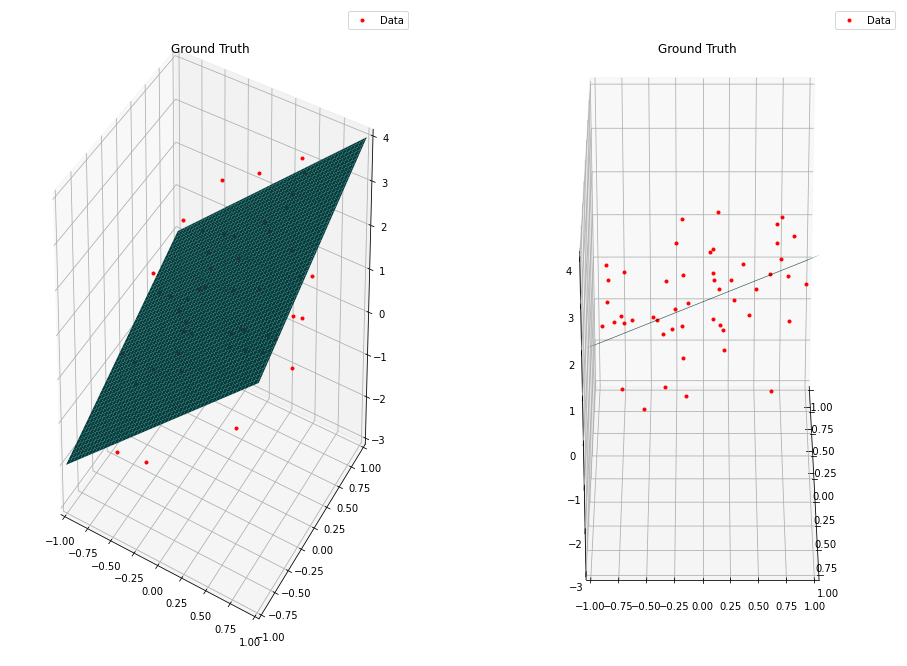

In [10]:
def f2(x, w, b):
    return np.matmul(x, w) + b

w = np.array([[2.],
              [1.]])
b = 1.

x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X2, X1 = np.meshgrid(x1, x2)
x_true = np.concatenate([np.reshape(X1,[-1,1]), np.reshape(X2,[-1,1])], axis=1)
y_true = f2(x_true, w, b)
Y = np.reshape(y_true, [100,100])

n = 50
x_data = np.random.uniform(-1, 1, size=(n,2))
y_data = f2(x_data, w, b) + np.random.randn(n, 1)

fig = plt.figure(figsize=(16, 12))
for i in range(2):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    surf = ax.plot_surface(X1, X2, Y, color='c')
    scat = ax.plot3D(x_data[:,0].flatten(), x_data[:,1].flatten(), y_data.flatten(), 'r.', label="Data")
    plt.legend()
    ax.set_title("Ground Truth")
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-3,4)
ax.view_init(30, 0)
plt.draw()
plt.show()

## Transforming data from numpy to pytorch tensors

Hint: use torch.from_numpy() function

In [11]:
# Data currently as numpy
print(type(x_data), type(y_data))
print('-----------------------')

# Transform numpy datatypes to pytorch tensors

############# COMPLETE THE CODE BELOW #############
x_data_tensor = torch.from_numpy(x_data.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))
###################################################

print(type(x_data_tensor), type(y_data_tensor))
print('-----------------------')

# In this case, the tensors are already 2d arrays!
print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
-----------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
-----------------------
torch.Size([50, 2]) torch.Size([50, 1])


## Create linear model

Hint: use nn.linear() function

In [12]:
# First, specify number of dimensions for both input and output data

############# COMPLETE THE CODE BELOW #############
input_size = 2
output_size = 1
model = nn.Linear(input_size, output_size)
###################################################

# The linear model initializes its weight and bias values randomly
print(model.weight)
print(model.bias)
print('-----------------------')

# Remember, we can print out only the values in the following way
weight1 = model.weight[0, 0].item()
weight2 = model.weight[0, 1].item()
bias = model.bias[0].item()
print(f'Weight: {weight1:.5f}, {weight2:.5f}\tBias: {bias:.5f}')

Parameter containing:
tensor([[-0.3361, -0.6826]], requires_grad=True)
Parameter containing:
tensor([-0.5813], requires_grad=True)
-----------------------
Weight: -0.33606, -0.68264	Bias: -0.58131


## Set loss and optimizing methods

Use Mean Squre Error (MSE) and Stochastic Gradient Descent (SGD) method

Hint: nn.MSELoss()

In [13]:
# For linear regression, we will use the mean squared error loss and optimize the model using the stochastic gradient descent method

############# COMPLETE THE CODE BELOW #############
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
###################################################

## Training the model

In [14]:
# Set the number of epochs
num_epochs = 2000

for epoch in range(num_epochs):
    
    ############# COMPLETE THE CODE BELOW #############
    # Compute forward pass
    y_pred_tensor = model(x_data_tensor)
    
    # Compute loss
    loss = loss_method(y_pred_tensor, y_data_tensor)
    
    # Compute backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    optimizer.zero_grad()
    
    ###################################################
    
    # Print progress
    if (epoch + 1) % 200 == 0:
        print(f'Epoch: {epoch+1}\tLoss = {loss.item():.5f}')

Epoch: 200	Loss = 1.21848
Epoch: 400	Loss = 1.03437
Epoch: 600	Loss = 1.00224
Epoch: 800	Loss = 0.99649
Epoch: 1000	Loss = 0.99546
Epoch: 1200	Loss = 0.99527
Epoch: 1400	Loss = 0.99524
Epoch: 1600	Loss = 0.99523
Epoch: 1800	Loss = 0.99523
Epoch: 2000	Loss = 0.99523


## Plotting the results

Original parameters: w = 2.0, 1.0, b = 1.0
Trained parameters: w = 1.86941, 0.66544, b = 1.08370


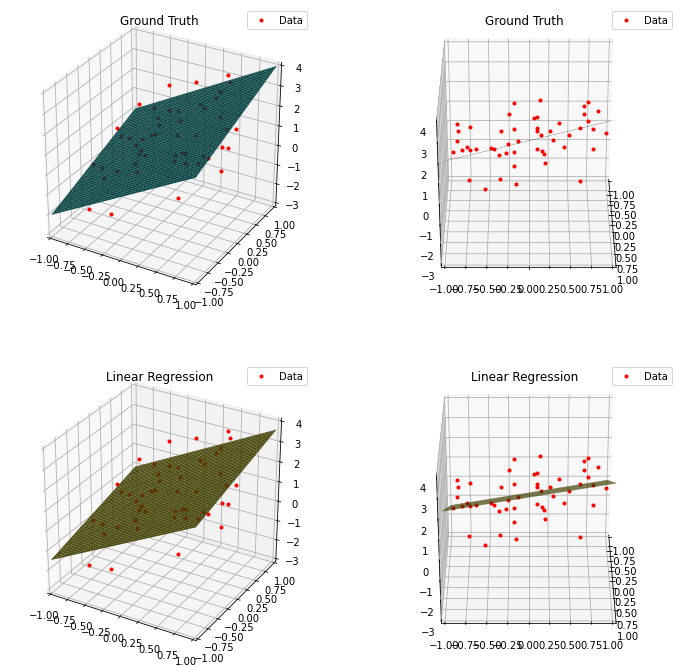

In [15]:
# Obtain the predicted results in the numpy datatype

############# COMPLETE THE CODE BELOW #############
x_true_tensor = torch.from_numpy(x_true.astype(np.float32)).view(-1,2)
y_pred_tensor = model(x_true_tensor).detach()
###################################################
y_pred = y_pred_tensor.numpy()


# Check the trained model's parameters
print(f'Original parameters: w = {w[0,0]}, {w[1,0]}, b = {b}')

############# COMPLETE THE CODE BELOW #############
weight1 = model.weight[0, 0].item()
weight2 = model.weight[0, 1].item()
bias = model.bias[0].item()
###################################################

print(f'Trained parameters: w = {weight1:.5f}, {weight2:.5f}, b = {bias:.5f}')

# Compute Y_pred for surface plot
Y_pred = np.reshape(y_pred, [100,100])

# Plot the results
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    if i < 2:
        ax.set_title("Ground Truth")
        surf = ax.plot_surface(X1, X2, Y, color='c')
    else:
        ax.set_title("Linear Regression")
        pred = ax.plot_surface(X1, X2, Y_pred, color='y')
    scat = ax.plot3D(x_data[:,0].flatten(), x_data[:,1].flatten(), y_data.flatten(), 'r.', label="Data")
    plt.legend()
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-3,4)
    if i % 2 == 1:
        ax.view_init(30, 0)
        plt.draw()
plt.show()

## Normal Equations
$w^* = (X^TX)^{-1}X^Ty$

Original parameters: w = 2.0, 1.0, b = 1.0
Trained parameters: w = 1.86941, 0.66544, b = 1.08370
Optimal parameters: w = 1.86969, 0.66578, b = 1.08368


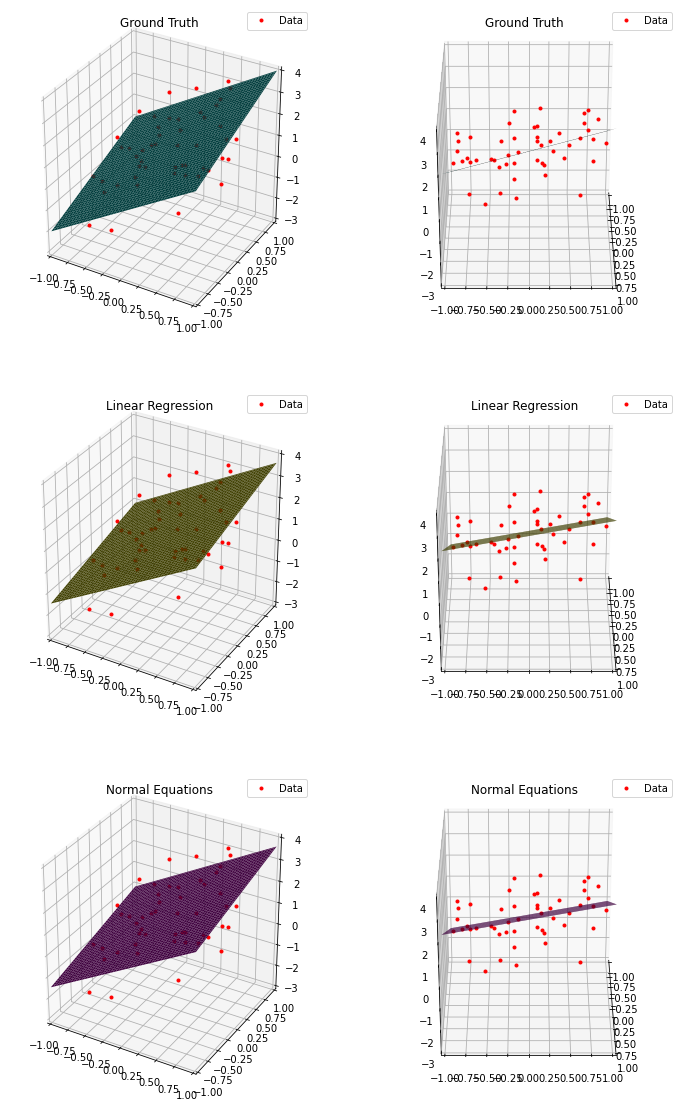

In [16]:
# Let's compare the results obtained with the analytic method!
X_intercept = np.concatenate([np.ones((x_data.shape[0], 1)), x_data], axis=1)

############# COMPLETE THE CODE BELOW #############
w_optimal = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ y_data
###################################################

print(f'Original parameters: w = {w[0,0]}, {w[1,0]}, b = {b}')
print(f'Trained parameters: w = {weight1:.5f}, {weight2:.5f}, b = {bias:.5f}')
print(f'Optimal parameters: w = {w_optimal[1,0]:.5f}, {w_optimal[2,0]:.5f}, b = {w_optimal[0,0]:.5f}')

# Compute Y_normal for surface plot
y_normal = f2(x_true, w_optimal[1:,0], w_optimal[0,0])
Y_normal = np.reshape(y_normal, [100,100])

# Plot the results
fig = plt.figure(figsize=(12, 20))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1, projection='3d')
    if i < 2:
        ax.set_title("Ground Truth")
        surf = ax.plot_surface(X1, X2, Y, color='c')
    elif i < 4:
        ax.set_title("Linear Regression")
        pred = ax.plot_surface(X1, X2, Y_pred, color='y')
    else:
        ax.set_title("Normal Equations")
        normal = ax.plot_surface(X1, X2, Y_normal, color='m')
    scat = ax.plot3D(x_data[:,0].flatten(), x_data[:,1].flatten(), y_data.flatten(), 'r.', label="Data")
    plt.legend()
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-3,4)
    if i % 2 == 1:
        ax.view_init(30, 0)
        plt.draw()
plt.show()



---



---


# General Linear Regression (Non-linear Regression)

- Given data generated from a non-linear function, plot the best fitted curve

Goal
- Construct the kernel matrix 
- Construct a linear model using PyTorch


## Non-linear 1D data generation

- Generating noisy data from the given function


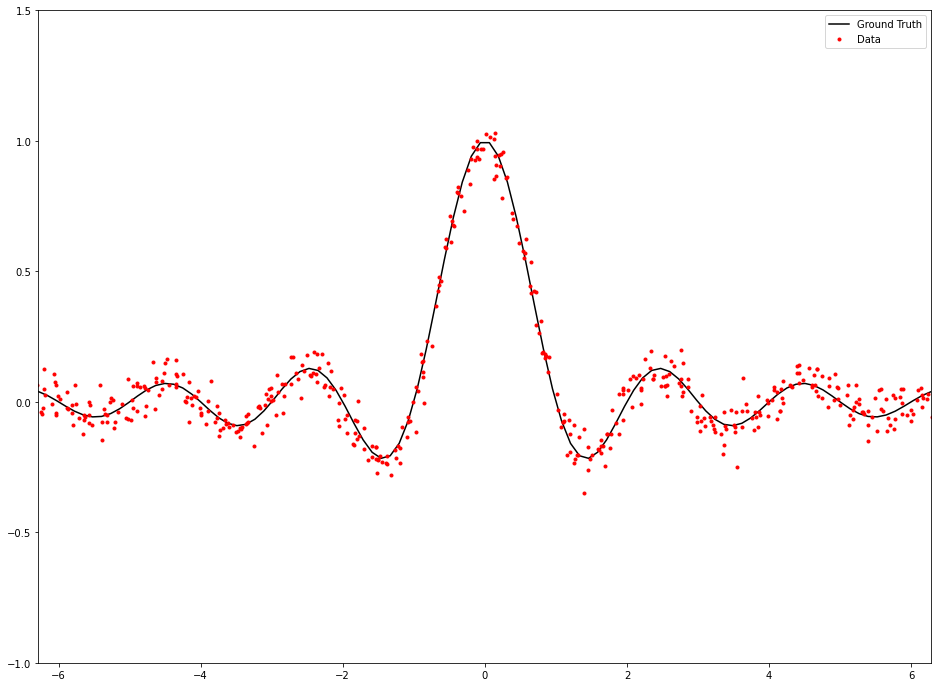

In [17]:
def f3(x):
    return np.sinc(x)

x_true = np.linspace(-2*np.pi, 2*np.pi, 100)
y_true = f3(x_true)

n = 500
x_data = np.linspace(-2*np.pi, 2*np.pi, n) + 0.05*np.random.randn(n)
y_data = f3(x_data) + 0.05*np.random.randn(n)

plt.figure(figsize=(16,12))
plt.plot(x_true, y_true, "k-", label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.legend()
plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-1, 1.5])
plt.show()

## Construct the kernel matrix

- Compute kernel matrix

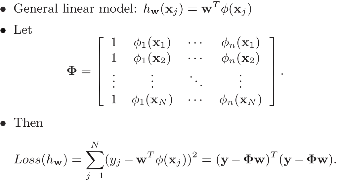

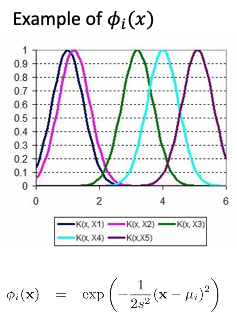

In [18]:
# Set fixed variables
n_kernel = 20
mu = np.linspace(-2*np.pi, 2*np.pi, n_kernel) # 20 even spaces throughout domain
inv_squared_s = 1e1

# Construct the kernel matrix
def kernelize_vanilla(x_data, n_kernel, mu, inv_squared_s):
    n_samples = len(x_data)
    out = np.zeros((n_samples, n_kernel)) # No need to add intercept since our pytorch linear model does it for us!
    
    ############## COMPLETE THE CODE BELOW #############
    for j in range(n_samples):
        x_j = x_data[j]
        for i in range(n_kernel):
            mu_i = mu[i]
            out[j, i] += np.exp(-0.5 * inv_squared_s * np.square(x_j - mu_i))
    ###################################################
    
    return out

# Construct the kernel matrix with broadcasting
def kernelize(x_data, n_kernel, mu, inv_squared_s):
    n_samples = len(x_data)
    out1 = np.square(x_data).reshape(n_samples,-1)
    out2 = x_data.reshape(n_samples,-1).dot(mu.reshape(1,-1))
    out3 = np.square(mu.reshape(1,-1))
    D_matrix = out1 - 2*out2 + out3
    out = -inv_squared_s*(D_matrix)/2
    assert out.shape == (n_samples, n_kernel)
    return np.exp(out)

import time
def measure_time(function):
    start_time = time.time()
    result = function
    end_time = time.time()
    return (end_time - start_time, result)

time1, temp1 = measure_time(kernelize_vanilla(x_data, n_kernel, mu, inv_squared_s))
time2, temp2 = measure_time(kernelize(x_data, n_kernel, mu, inv_squared_s))
err = np.sum(np.abs(temp1 - temp2))
print(f'Vanilla implementation   : {time1:.10f}s')
print(f'Vectorized implementation: {time2:.10f}s')
print(f'Relative error: {err}')

# Now, we "kernelize" the data input data
x_data_kernel = kernelize(x_data, n_kernel, mu, inv_squared_s)

Vanilla implementation   : 0.0000009537s
Vectorized implementation: 0.0000002384s
Relative error: 3.701571269639185e-12


## Transforming data from numpy to pytorch tensors

In [19]:
# Data currently as numpy
print(type(x_data_kernel), type(y_data))
print('-----------------------')

# Transform numpy datatypes to pytorch tensors

############# COMPLETE THE CODE BELOW #############
x_data_tensor = torch.from_numpy(x_data_kernel.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))
###################################################

print(type(x_data_tensor), type(y_data_tensor))
print('-----------------------')

# In order to use the in-built pytorch models, we need to convert the tensors into 2d arrays
print(x_data_tensor.shape, y_data_tensor.shape)

############# COMPLETE THE CODE BELOW #############
y_data_tensor = y_data_tensor.view(-1, 1)
###################################################

print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
-----------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
-----------------------
torch.Size([500, 20]) torch.Size([500])
torch.Size([500, 20]) torch.Size([500, 1])


## Create linear model

In [20]:
# First, specify number of dimensions for both input and output data

############# COMPLETE THE CODE BELOW #############
input_size = n_kernel
output_size = 1
model = nn.Linear(input_size, output_size)
###################################################

# The linear model initializes its weight and bias values randomly
print(model.weight)
print(model.bias)
print('-----------------------')

# Remember, we can print out only the values in the following way
weight = []
for i in range(n_kernel):
    weight.append(model.weight[0,i].item())
    if i%5==0:
        print(f'Weight: {weight[i]:.5f}', end=',\t')
    elif i%5==4:
        print(f'{weight[i]:.5f}')
    else:
        print(f'{weight[i]:.5f}', end=',\t')
bias = model.bias[0].item()
print(f'Bias: {bias:.5f}')

Parameter containing:
tensor([[ 0.2177,  0.1313,  0.0806,  0.1409, -0.1552,  0.1978, -0.0964, -0.0736,
          0.0543,  0.2136,  0.1409, -0.2034, -0.0113,  0.1980, -0.1663, -0.1732,
         -0.1441, -0.0244, -0.0547,  0.2038]], requires_grad=True)
Parameter containing:
tensor([0.1889], requires_grad=True)
-----------------------
Weight: 0.21772,	0.13135,	0.08059,	0.14093,	-0.15521
Weight: 0.19781,	-0.09643,	-0.07358,	0.05427,	0.21358
Weight: 0.14090,	-0.20343,	-0.01130,	0.19799,	-0.16626
Weight: -0.17318,	-0.14408,	-0.02437,	-0.05473,	0.20381
Bias: 0.18893


## Set loss and optimizing methods

In [21]:
# For linear regression, we will use the mean squared error loss and optimize the model using the stochastic gradient descent method

############# COMPLETE THE CODE BELOW #############
learning_rate = 0.05
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
###################################################

## Training the model

In [22]:
# Set the number of epochs
num_epochs = 2000

for epoch in range(num_epochs):
    
    ############# COMPLETE THE CODE BELOW #############
    # Compute forward pass
    y_pred_tensor = model(x_data_tensor)
    
    # Compute loss
    loss = loss_method(y_pred_tensor, y_data_tensor)
    
    # Compute backward pass
    loss.backward()
    
    # Update parameters (Remember to reset gradients!)
    optimizer.step()
    optimizer.zero_grad()
    
    ###################################################
    
    # Print progress
    if (epoch + 1) % 200 == 0:
        print(f'Epoch: {epoch+1}\tLoss = {loss.item():.5f}')

Epoch: 200	Loss = 0.01013
Epoch: 400	Loss = 0.00439
Epoch: 600	Loss = 0.00342
Epoch: 800	Loss = 0.00318
Epoch: 1000	Loss = 0.00310
Epoch: 1200	Loss = 0.00307
Epoch: 1400	Loss = 0.00306
Epoch: 1600	Loss = 0.00305
Epoch: 1800	Loss = 0.00305
Epoch: 2000	Loss = 0.00304


## Plotting the results

Trained parameters:
Weight: 0.00194,	-0.10333,	-0.04359,	0.04542,	-0.16253
Weight: -0.03331,	0.10007,	-0.24937,	-0.14546,	0.73785
Weight: 0.74797,	-0.12231,	-0.23558,	0.11775,	-0.07579
Weight: -0.14143,	0.03374,	-0.01521,	-0.10204,	-0.01461
Bias: 0.05412


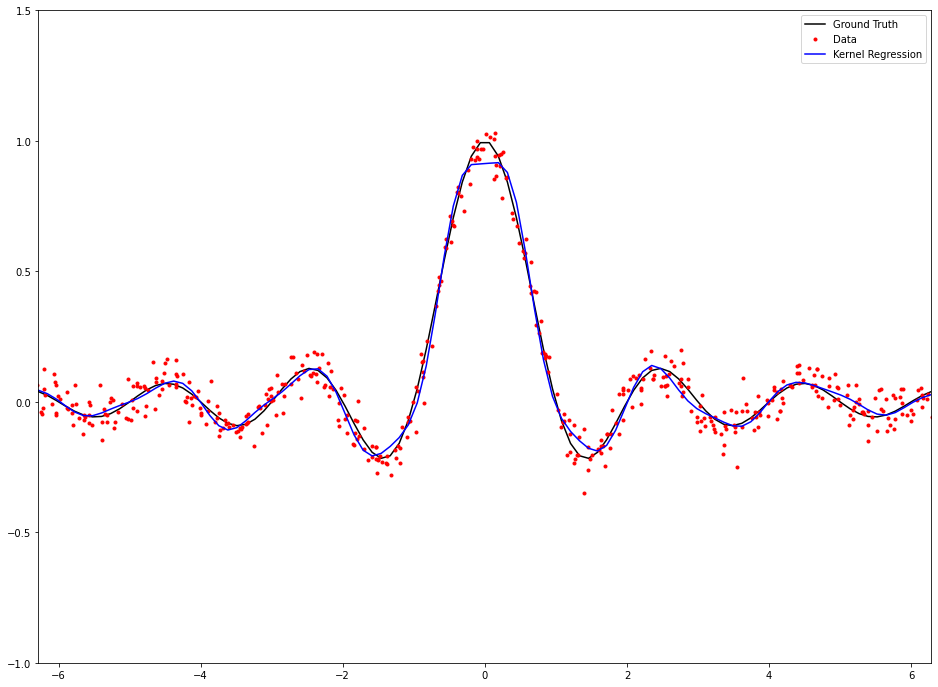

In [23]:
# Obtain the predicted results in the numpy datatype

############# COMPLETE THE CODE BELOW #############
x_true_kernel = kernelize(x_true, n_kernel, mu, inv_squared_s)
x_true_tensor = torch.from_numpy(x_true_kernel.astype(np.float32))
y_pred_tensor = model(x_true_tensor).detach()
y_pred = y_pred_tensor.numpy()
###################################################

# Check the trained model's parameters
print('Trained parameters:')
weight = []
for i in range(n_kernel):
    weight.append(model.weight[0,i].item())
    if i%5==0:
        print(f'Weight: {weight[i]:.5f}', end=',\t')
    elif i%5==4:
        print(f'{weight[i]:.5f}')
    else:
        print(f'{weight[i]:.5f}', end=',\t')
bias = model.bias[0].item()
print(f'Bias: {bias:.5f}')

# Plot the results
plt.figure(figsize=(16, 12))
plt.plot(x_true, y_true, "k-", label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.plot(x_true, y_pred, "b-", label="Kernel Regression")
plt.legend()
plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-1, 1.5])
plt.show()